<a href="https://colab.research.google.com/github/barrosyan/AstroML/blob/main/Estudos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Importing the Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [ ]:
file_path = '/content/drive/MyDrive/debs.dat'

sigma = 5.67e-8  # W m^-2 K^-4

df = pd.read_csv(file_path, delimiter='\s+')
df.iloc[0]

#         EPIC_203710387
System             M4.5V
SpT1                 M5V
SpT2               2.809
Pday                14.3
Vmag                 1.8
BmV              -0.9363
logM1             0.0116
logM1e           -0.9763
logM2             0.0111
logM2e           -0.3648
logR1             0.0055
logR1e            -0.373
logR2             0.0057
logR2e             4.231
logg1               0.01
logg1e             4.207
logg2               0.01
logg2e             3.483
logT1              0.011
logT1e             3.483
logT2              0.011
logT2e            -1.842
logL1              0.047
logL1e            -1.861
logL2              0.047
logL2e             -9.99
MoH                -9.99
MoHe                 NaN
Name: 0, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       326 non-null    object 
 1   System  326 non-null    object 
 2   SpT1    326 non-null    object 
 3   SpT2    326 non-null    float64
 4   Pday    326 non-null    float64
 5   Vmag    326 non-null    float64
 6   BmV     326 non-null    float64
 7   logM1   326 non-null    float64
 8   logM1e  326 non-null    float64
 9   logM2   326 non-null    float64
 10  logM2e  326 non-null    float64
 11  logR1   326 non-null    float64
 12  logR1e  326 non-null    float64
 13  logR2   326 non-null    float64
 14  logR2e  326 non-null    float64
 15  logg1   326 non-null    float64
 16  logg1e  326 non-null    float64
 17  logg2   326 non-null    float64
 18  logg2e  326 non-null    float64
 19  logT1   326 non-null    float64
 20  logT1e  326 non-null    float64
 21  logT2   326 non-null    float64
 22  lo

In [ ]:
sigma = 5.67e-8

sun_radius_log = 6.95e8

df['R1'] = 10 ** df['logR1'] * sun_radius_log
df['T1'] = 10 ** df['logT1']

df['L1'] = 4 * np.pi * (df['R1']**2) * sigma * (df['T1']**4)

In [ ]:
df['logL1'] = np.where(df['logL1'] == -9.99, np.nan, df['logL1'])

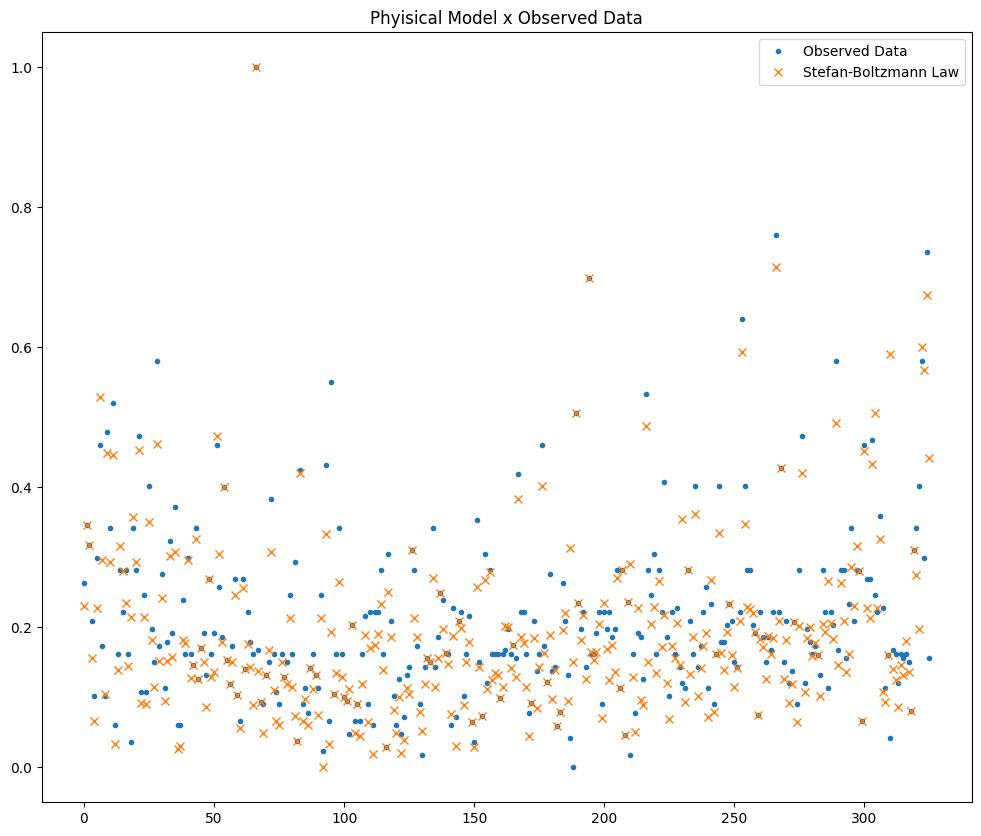

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df['L1'].values.reshape(-1,1))
df['L1'] = scaler.transform(df['L1'].values.reshape(-1,1))

scaler.fit(df['logL1'].values.reshape(-1,1))
df['logL1'] = scaler.transform(df['logL1'].values.reshape(-1,1))

plt.figure(figsize=(12,10))
plt.plot(df['logL1'], '.', label='Observed Data')
plt.plot(df['L1'], 'x', label='Stefan-Boltzmann Law')
plt.title('Phyisical Model x Observed Data')
plt.legend()

In [ ]:
df['logL1'].fillna(df['L1'], inplace=True)

In [ ]:
baseline  = np.mean((df['logL1'].values[len(df['logL1'])//2:] - df['L1'].values[len(df['L1'])//2:])**2)
baseline

0.006603862864288783

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import numpy as np

In [ ]:
X = df[['R1', 'T1']].values
y = df['logL1'].values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)

scaler.fit(y)
y_norm = scaler.transform(y)

X_test, X_train, y_test, y_train = X_norm[:len(X_norm)//2], X_norm[len(X_norm)//2:], y_norm[:len(X_norm)//2], y_norm[len(X_norm)//2:]

Text(0.5, 1.0, 'Input Variables')

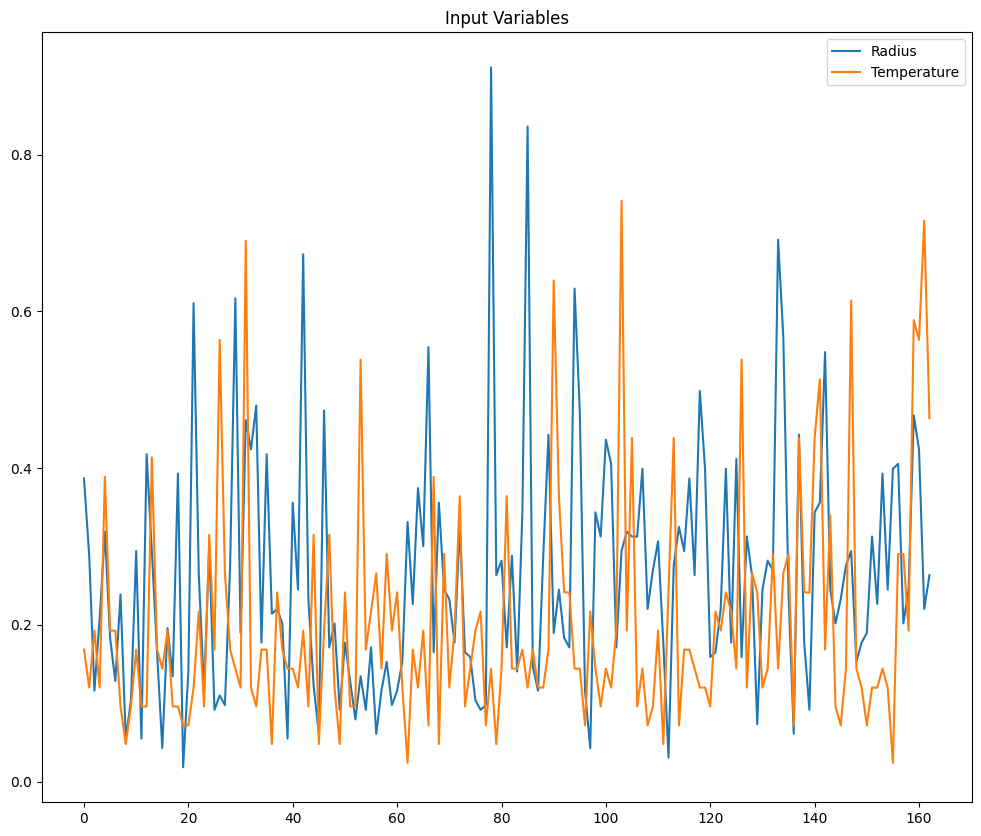

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(X_train[:,0], label='Radius')
plt.plot(X_train[:,1], label='Temperature')
plt.legend()
plt.title('Input Variables')

Text(0.5, 1.0, 'Dispersion Plot')

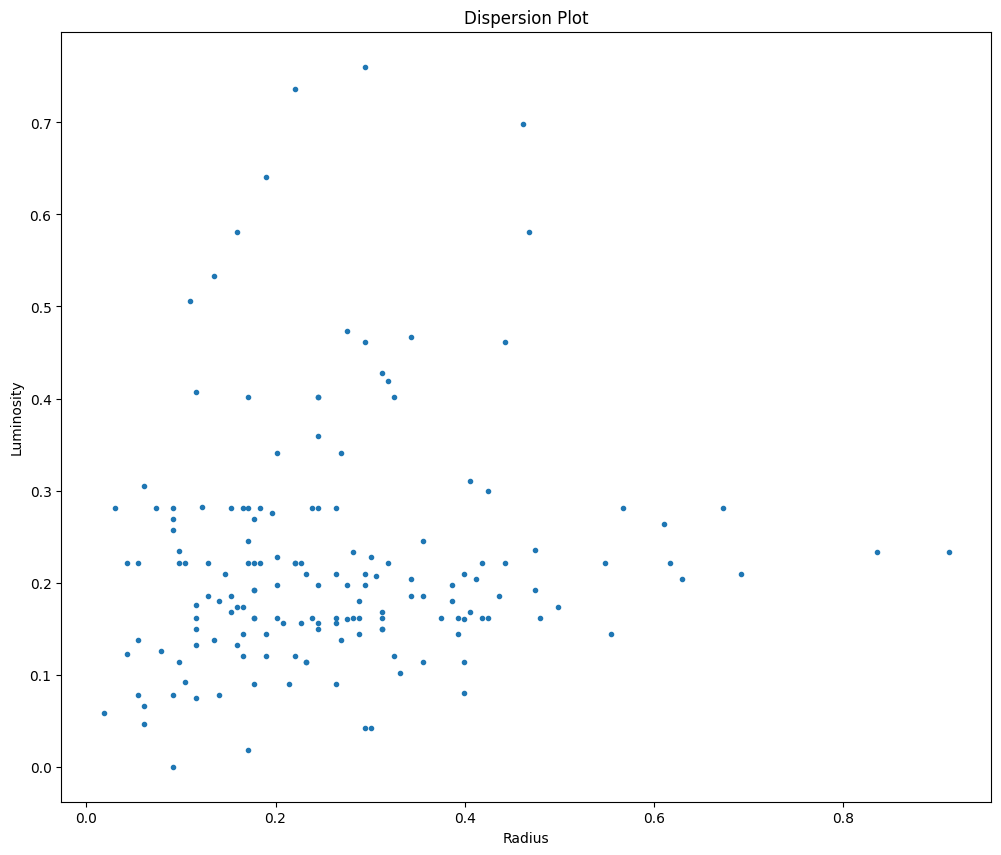

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(X_train[:,0], y_train, '.')
plt.xlabel('Radius')
plt.ylabel('Luminosity')
plt.title('Dispersion Plot')

Text(0.5, 1.0, 'Dispersion Plot')

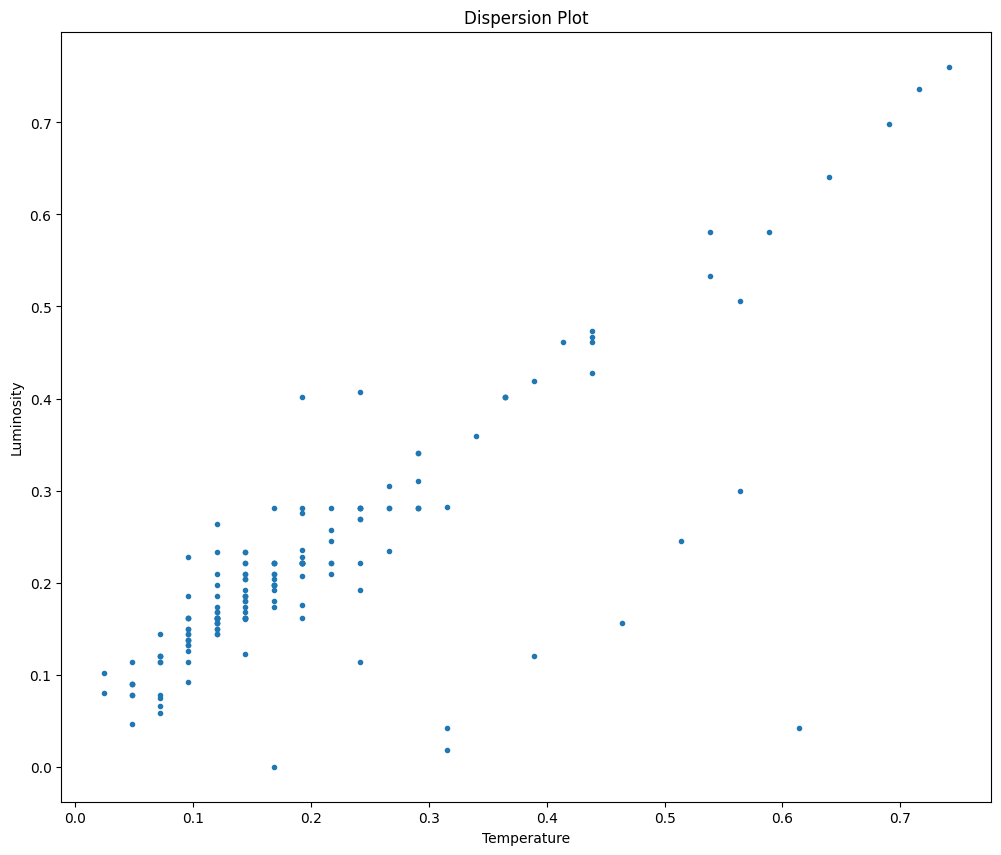

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(X_train[:,1], y_train, '.')
plt.xlabel('Temperature')
plt.ylabel('Luminosity')
plt.title('Dispersion Plot')

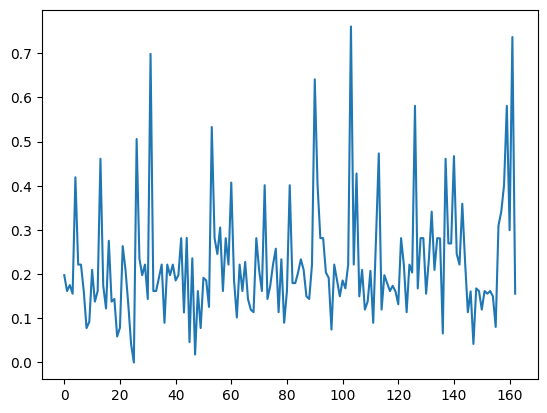

In [ ]:
plt.plot(y_train)

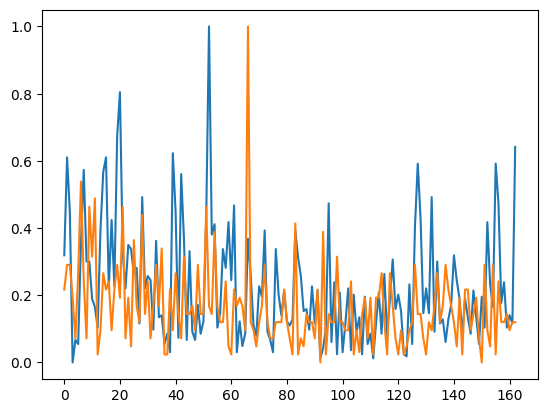

In [ ]:
plt.plot(X_test)

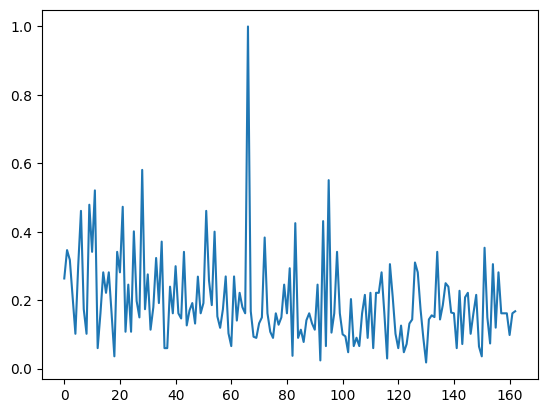

In [ ]:
plt.plot(y_test)

In [ ]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

In [ ]:
class LinearRegression(nn.Module):
  def __init__(self, input_size):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_size, 1)

  def forward(self, x):
    return self.linear(x)

In [ ]:
input_size = X_train.shape[1]
model = LinearRegression(input_size)

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
num_epochs = 10000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch [5001/10000], Loss: 0.0054
Epoch [5002/10000], Loss: 0.0116
Epoch [5003/10000], Loss: 0.0087
Epoch [5004/10000], Loss: 0.0055
Epoch [5005/10000], Loss: 0.0071
Epoch [5006/10000], Loss: 0.0101
Epoch [5007/10000], Loss: 0.0043
Epoch [5008/10000], Loss: 0.0073
Epoch [5009/10000], Loss: 0.0072
Epoch [5010/10000], Loss: 0.0123
Epoch [5011/10000], Loss: 0.0043
Epoch [5012/10000], Loss: 0.0130
Epoch [5013/10000], Loss: 0.0084
Epoch [5014/10000], Loss: 0.0061
Epoch [5015/10000], Loss: 0.0072
Epoch [5016/10000], Loss: 0.0075
Epoch [5017/10000], Loss: 0.0031
Epoch [5018/10000], Loss: 0.0041
Epoch [5019/10000], Loss: 0.0067
Epoch [5020/10000], Loss: 0.0036
Epoch [5021/10000], Loss: 0.0115
Epoch [5022/10000], Loss: 0.0058
Epoch [5023/10000], Loss: 0.0056
Epoch [5024/10000], Loss: 0.0153
Epoch [5025/10000], Loss: 0.0057
Epoch [5026/10000], Loss: 0.0084
Epoch [5027/10000], Loss: 0.0095
Epoch [5028/10000], Loss: 0.0084
Epoch [5029/10000

In [ ]:
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

In [ ]:
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0032


In [ ]:
np.sqrt(test_loss.item())

0.05064074629039652

Text(0.5, 1.0, 'Linear Neural Network Model')

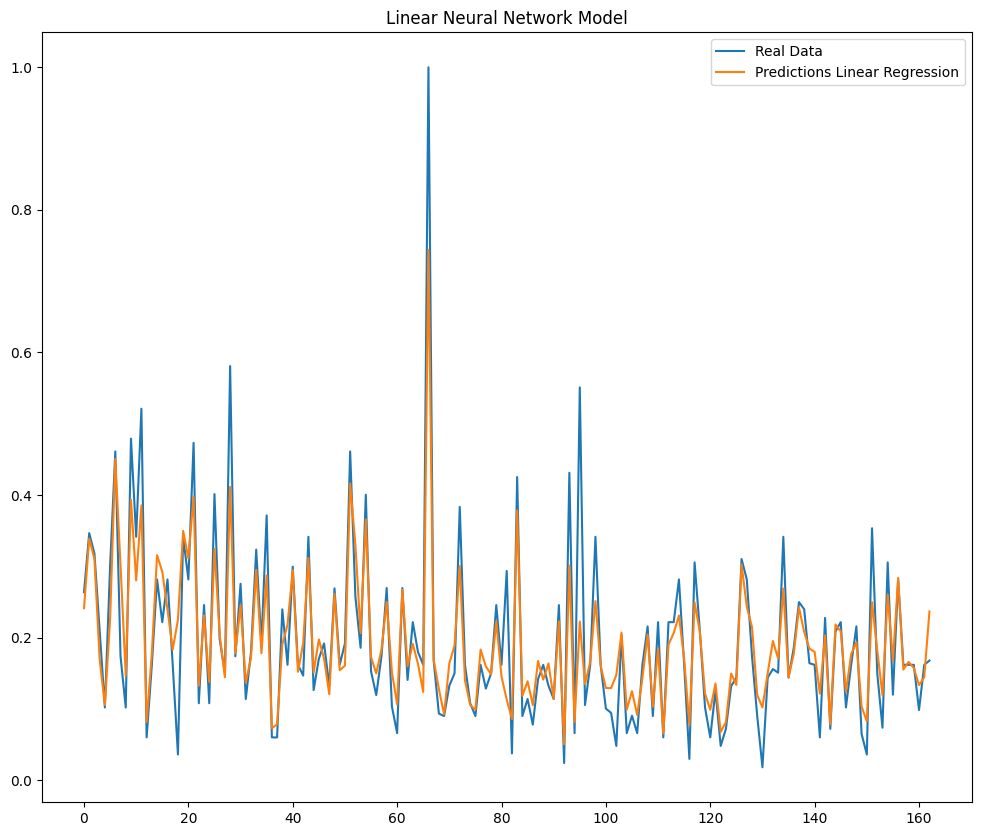

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(y_test_tensor, label='Real Data')
plt.plot(predictions, label='Predictions Linear Regression')
plt.legend()
plt.title('Linear Neural Network Model')

In [ ]:
import math
from torch.autograd import grad

class PINNLoss(nn.Module):
  def __init__(self, data_weight=1.0, physics_weight=1.0):
    super(PINNLoss, self).__init__()
    self.data_weight = data_weight
    self.physics_weight = physics_weight

  def forward(self, inputs, targets, model):
    predictions = model(inputs)
    data_loss = nn.MSELoss()(predictions, targets)

    inputs.requires_grad = True
    physics_loss = self.physics_penalty(inputs, model)

    loss = self.data_weight * data_loss + self.physics_weight * physics_loss

    return loss

  def physics_penalty(self, inputs, model):
    # Exemplo: Lei de Stefan-Boltzmann
    radius_ratio, temperature = torch.split(inputs, 1, dim=1)
    luminosity_calc = model(inputs)

    # Calcular derivadas parciais diretamente usando torch.autograd.grad
    luminosity_der = torch.autograd.grad(luminosity_calc.sum(), inputs, create_graph=True)[0]

    # Calcula a penalidade física
    physics_loss = torch.mean((luminosity_der[:, 0] - 4 * math.pi * radius_ratio**2 * temperature**4)**2)
    return physics_loss

In [ ]:
loss_function = PINNLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        loss = loss_function(inputs, targets, model)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/10000], Loss: 0.0031
Epoch [2/10000], Loss: 0.0219
Epoch [3/10000], Loss: 0.0112
Epoch [4/10000], Loss: 0.0269
Epoch [5/10000], Loss: 0.0176
Epoch [6/10000], Loss: 0.0126
Epoch [7/10000], Loss: 0.0051
Epoch [8/10000], Loss: 0.0034
Epoch [9/10000], Loss: 0.0159
Epoch [10/10000], Loss: 0.0086
Epoch [11/10000], Loss: 0.0072
Epoch [12/10000], Loss: 0.0100
Epoch [13/10000], Loss: 0.0118
Epoch [14/10000], Loss: 0.0138
Epoch [15/10000], Loss: 0.0120
Epoch [16/10000], Loss: 0.0176
Epoch [17/10000], Loss: 0.0077
Epoch [18/10000], Loss: 0.0017
Epoch [19/10000], Loss: 0.0121
Epoch [20/10000], Loss: 0.0191
Epoch [21/10000], Loss: 0.0020
Epoch [22/10000], Loss: 0.0062
Epoch [23/10000], Loss: 0.0156
Epoch [24/10000], Loss: 0.0113
Epoch [25/10000], Loss: 0.0152
Epoch [26/10000], Loss: 0.0093
Epoch [27/10000], Loss: 0.0173
Epoch [28/10000], Loss: 0.0063
Epoch [29/10000], Loss: 0.0088
Epoch [30/10000], Loss: 0.0062
Epoch [31/10000], Loss: 0.0146
Epoch [32/10000], Loss: 0.0177
Epoch [33/10000],

KeyboardInterrupt: ignored

In [ ]:
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

In [ ]:
with torch.no_grad():
    model.eval()
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

In [ ]:
np.sqrt(np.array(test_loss.item()))

0.05294848834863384

Text(0.5, 1.0, 'Linear Physics Informed Neural Network Model')

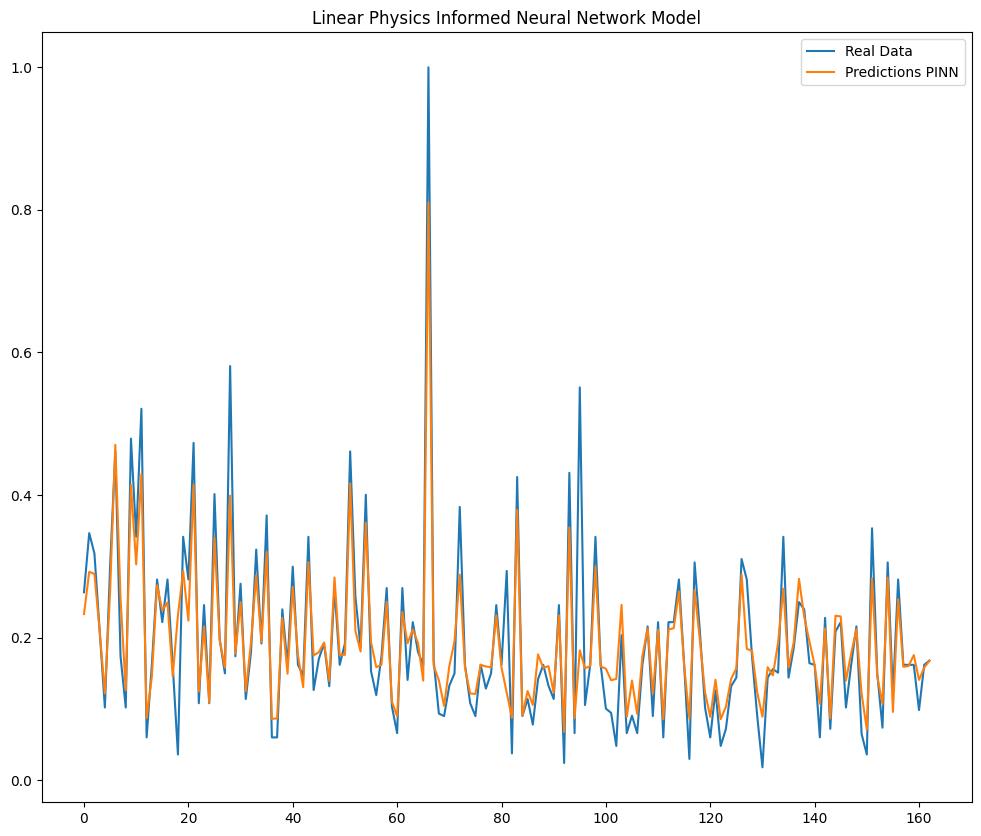

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(y_test_tensor, label='Real Data')
plt.plot(predictions, label='Predictions PINN')
plt.legend()
plt.title('Linear Physics Informed Neural Network Model')

In [ ]:
import math
from torch.autograd import grad
import torch.nn.functional as F

class AugmentedModel(nn.Module):
  def __init__(self, input_size):
    super(AugmentedModel, self).__init__()
    self.layer1 = nn.Linear(input_size, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 32)
    self.layer4 = nn.Linear(32, 1)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = self.dropout(x)
    x = F.relu(self.layer2(x))
    x = self.dropout(x)
    x = F.relu(self.layer3(x))
    x = self.dropout(x)
    x = self.layer4(x)
    return x

class PINNLoss(nn.Module):
  def __init__(self, data_weight=1.0, physics_weight=1.0):
    super(PINNLoss, self).__init__()
    self.data_weight = data_weight
    self.physics_weight = physics_weight

  def forward(self, inputs, targets, model):
    predictions = model(inputs)
    data_loss = nn.MSELoss()(predictions, targets)

    inputs.requires_grad = True
    physics_loss = self.physics_penalty(inputs, model)

    loss = self.data_weight * data_loss + self.physics_weight * physics_loss

    return loss

  def physics_penalty(self, inputs, model):
    radius_ratio, temperature = torch.split(inputs, 1, dim=1)
    luminosity_calc = model(inputs)

    luminosity_der = torch.autograd.grad(luminosity_calc.sum(), inputs, create_graph=True)[0]

    physics_loss = torch.mean((luminosity_der[:, 0] - 4 * math.pi * radius_ratio**2 * temperature**4)**2)
    return physics_loss

In [ ]:
augmented_model = AugmentedModel(input_size=2)
loss_function = PINNLoss()
optimizer = torch.optim.Adam(augmented_model.parameters(), lr=0.01)

In [ ]:
num_epochs = 10000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        loss = loss_function(inputs, targets, augmented_model)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch [5001/10000], Loss: 0.0096
Epoch [5002/10000], Loss: 0.0223
Epoch [5003/10000], Loss: 0.0113
Epoch [5004/10000], Loss: 0.0055
Epoch [5005/10000], Loss: 0.0117
Epoch [5006/10000], Loss: 0.0078
Epoch [5007/10000], Loss: 0.0231
Epoch [5008/10000], Loss: 0.0270
Epoch [5009/10000], Loss: 0.0120
Epoch [5010/10000], Loss: 0.0056
Epoch [5011/10000], Loss: 0.0136
Epoch [5012/10000], Loss: 0.0099
Epoch [5013/10000], Loss: 0.0201
Epoch [5014/10000], Loss: 0.0197
Epoch [5015/10000], Loss: 0.0092
Epoch [5016/10000], Loss: 0.0213
Epoch [5017/10000], Loss: 0.0085
Epoch [5018/10000], Loss: 0.0085
Epoch [5019/10000], Loss: 0.0194
Epoch [5020/10000], Loss: 0.0127
Epoch [5021/10000], Loss: 0.0143
Epoch [5022/10000], Loss: 0.0095
Epoch [5023/10000], Loss: 0.0145
Epoch [5024/10000], Loss: 0.0240
Epoch [5025/10000], Loss: 0.0130
Epoch [5026/10000], Loss: 0.0271
Epoch [5027/10000], Loss: 0.0122
Epoch [5028/10000], Loss: 0.0100
Epoch [5029/10000

In [ ]:
from torchsummary import summary
augmented_size = AugmentedModel(input_size)
summary(augmented_size, (input_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]             384
           Dropout-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
           Dropout-4                   [-1, 64]               0
            Linear-5                   [-1, 32]           2,080
           Dropout-6                   [-1, 32]               0
            Linear-7                    [-1, 1]              33
Total params: 10,753
Trainable params: 10,753
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04
----------------------------------------------------------------


In [ ]:
for nome_parametro, parametro in augmented_model.named_parameters():
    print(f"Nome: {nome_parametro}, Forma: {parametro.shape}")

Nome: layer1.weight, Forma: torch.Size([128, 2])
Nome: layer1.bias, Forma: torch.Size([128])
Nome: layer2.weight, Forma: torch.Size([64, 128])
Nome: layer2.bias, Forma: torch.Size([64])
Nome: layer3.weight, Forma: torch.Size([32, 64])
Nome: layer3.bias, Forma: torch.Size([32])
Nome: layer4.weight, Forma: torch.Size([1, 32])
Nome: layer4.bias, Forma: torch.Size([1])


In [ ]:
pesos_raio = []
pesos_temperatura = []
bias_raio = []
bias_temperatura = []
for nome_parametro, parametro in augmented_model.named_parameters():
    if 'weight' in nome_parametro:
        try:
          pesos_raio.append(np.mean(np.array(parametro.data[0])))
        except:
          pass
        try:
          pesos_temperatura.append(np.mean(np.array(parametro.data[1])))
        except:
          pass
    elif 'bias' in nome_parametro:
        try:
          bias_raio.append(np.mean(np.array(parametro.data[0])))
        except:
          pass
        try:
          bias_temperatura.append(np.mean(np.array(parametro.data[1])))
        except:
          pass

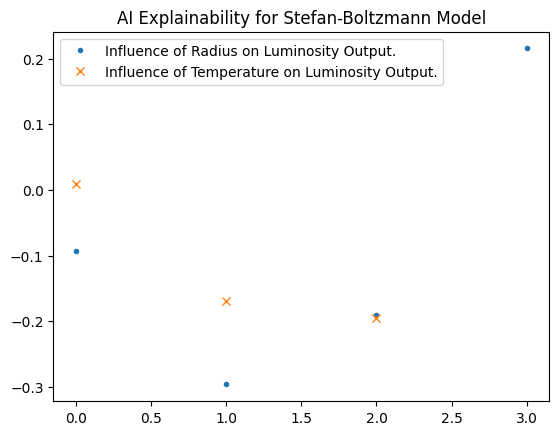

In [ ]:
plt.plot(np.array(pesos_raio) + np.array(bias_raio), '.', label='Influence of Radius on Luminosity Output.')
plt.plot(np.array(pesos_temperatura) + np.array(bias_temperatura), 'x', label='Influence of Temperature on Luminosity Output.')
plt.title('AI Explainability for Stefan-Boltzmann Model (Including Bias)')
plt.legend()

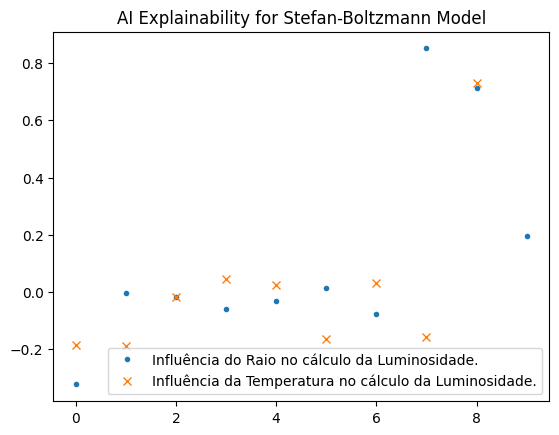

In [ ]:
plt.plot(bias_raio, '.', label='Influência do Raio no cálculo da Luminosidade.')
plt.plot(bias_temperatura, 'x', label='Influência da Temperatura no cálculo da Luminosidade.')
plt.title('AI Explainability for Stefan-Boltzmann Model')
plt.legend()

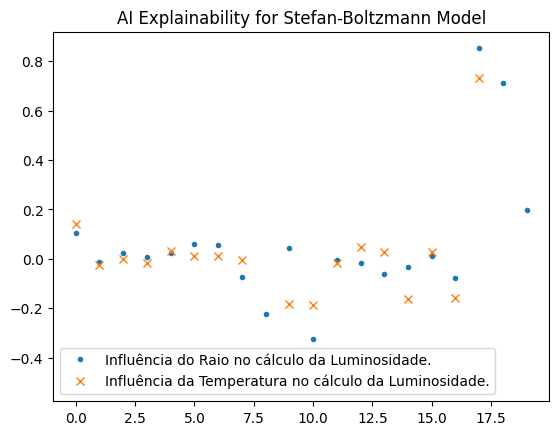

In [ ]:
plt.plot(pesos_raio + bias_raio, '.', label='Influência do Raio no cálculo da Luminosidade.')
plt.plot(pesos_temperatura + bias_temperatura, 'x', label='Influência da Temperatura no cálculo da Luminosidade.')
plt.title('AI Explainability for Stefan-Boltzmann Model')
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
    augmented_model.eval()
    predictions = augmented_model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0073


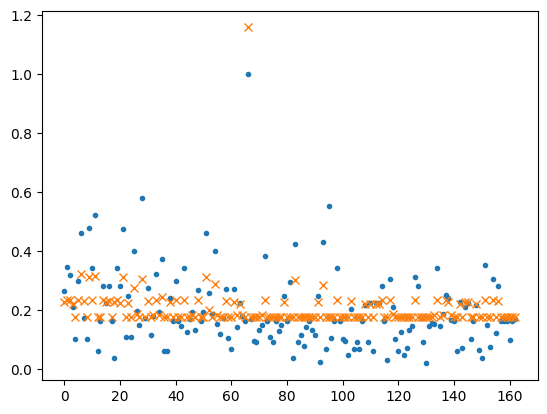

In [ ]:
plt.plot(y_test_tensor, '.', label='Real Data')
plt.plot(predictions, 'x', label='Predictions PINN')

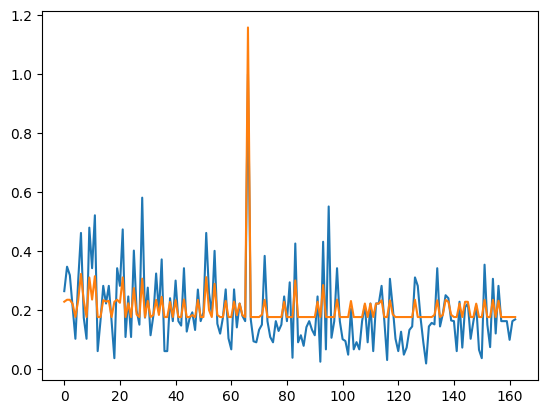

In [ ]:
plt.plot(y_test_tensor, label='Real Data')
plt.plot(predictions, label='Predictions PINN')

https://www.astro.keele.ac.uk/jkt/debcat/

In [ ]:
import math
from torch.autograd import grad
import torch.nn.functional as F

class AugmentedModel(nn.Module):
  def __init__(self, input_size):
    super(AugmentedModel, self).__init__()
    self.layer1 = nn.Linear(input_size, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = self.dropout(x)
    x = F.relu(self.layer2(x))
    x = self.dropout(x)
    x = F.relu(self.layer3(x))
    x = self.dropout(x)
    x = self.layer4(x)
    return x

class PINNLoss(nn.Module):
  def __init__(self, data_weight=1.0, physics_weight=1.0):
    super(PINNLoss, self).__init__()
    self.data_weight = data_weight
    self.physics_weight = physics_weight

  def forward(self, inputs, targets, model):
    predictions = model(inputs)
    data_loss = nn.MSELoss()(predictions, targets)

    inputs.requires_grad = True
    physics_loss = self.physics_penalty(inputs, model)

    loss = self.data_weight * data_loss + self.physics_weight * physics_loss

    return loss

  def physics_penalty(self, inputs, model):
    radius_ratio, temperature = torch.split(inputs, 1, dim=1)
    luminosity_calc = model(inputs)

    luminosity_der = torch.autograd.grad(luminosity_calc.sum(), inputs, create_graph=True)[0]

    physics_loss = torch.mean((luminosity_der[:, 0] - 4 * math.pi * radius_ratio**2 * temperature**4)**2)
    return physics_loss

In [ ]:
augmented_model = AugmentedModel(input_size=2)
loss_function = PINNLoss()
optimizer = torch.optim.Adam(augmented_model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        loss = loss_function(inputs, targets, augmented_model)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch [5001/10000], Loss: 0.0189
Epoch [5002/10000], Loss: 0.0240
Epoch [5003/10000], Loss: 0.0154
Epoch [5004/10000], Loss: 0.0051
Epoch [5005/10000], Loss: 0.0036
Epoch [5006/10000], Loss: 0.0224
Epoch [5007/10000], Loss: 0.0060
Epoch [5008/10000], Loss: 0.0041
Epoch [5009/10000], Loss: 0.0072
Epoch [5010/10000], Loss: 0.0039
Epoch [5011/10000], Loss: 0.0053
Epoch [5012/10000], Loss: 0.0121
Epoch [5013/10000], Loss: 0.0034
Epoch [5014/10000], Loss: 0.0060
Epoch [5015/10000], Loss: 0.0227
Epoch [5016/10000], Loss: 0.0200
Epoch [5017/10000], Loss: 0.0098
Epoch [5018/10000], Loss: 0.0096
Epoch [5019/10000], Loss: 0.0089
Epoch [5020/10000], Loss: 0.0073
Epoch [5021/10000], Loss: 0.0080
Epoch [5022/10000], Loss: 0.0137
Epoch [5023/10000], Loss: 0.0084
Epoch [5024/10000], Loss: 0.0232
Epoch [5025/10000], Loss: 0.0185
Epoch [5026/10000], Loss: 0.0083
Epoch [5027/10000], Loss: 0.0026
Epoch [5028/10000], Loss: 0.0106
Epoch [5029/10000

In [ ]:
with torch.no_grad():
    augmented_model.eval()
    predictions = augmented_model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0050


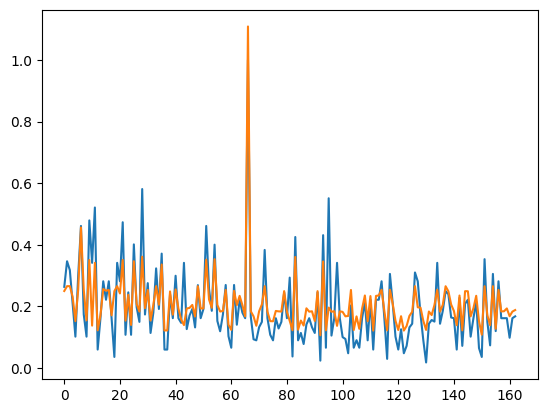

In [ ]:
plt.plot(y_test_tensor, label='Real Data')
plt.plot(predictions, label='Predictions PINN')

In [ ]:
import math
from torch.autograd import grad
import torch.nn.functional as F

class AugmentedModel(nn.Module):
  def __init__(self, input_size):
    super(AugmentedModel, self).__init__()
    self.layer1 = nn.Linear(input_size, 128)
    self.layer2 = nn.Linear(128, 64)
    self.layer3 = nn.Linear(64, 32)
    self.layer4 = nn.Linear(32, 1)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = F.relu(self.layer1(x))
    x = self.dropout(x)
    x = F.relu(self.layer2(x))
    x = self.dropout(x)
    x = F.relu(self.layer3(x))
    x = self.dropout(x)
    x = self.layer4(x)
    return x

class PINNLoss(nn.Module):
  def __init__(self, data_weight=1.0, physics_weight=1.0):
    super(PINNLoss, self).__init__()
    self.data_weight = data_weight
    self.physics_weight = physics_weight

  def forward(self, inputs, targets, model):
    predictions = model(inputs)
    data_loss = nn.MSELoss()(predictions, targets)

    inputs.requires_grad = True
    physics_loss = self.physics_penalty(inputs, model)

    loss = self.data_weight * data_loss + self.physics_weight * physics_loss

    return loss

  def physics_penalty(self, inputs, model):
    radius_ratio, temperature = torch.split(inputs, 1, dim=1)
    luminosity_calc = model(inputs)

    luminosity_der = torch.autograd.grad(luminosity_calc.sum(), inputs, create_graph=True)[0]

    physics_loss = torch.mean((luminosity_der[:, 0] - 4 * math.pi * radius_ratio**2 * temperature**4)**2)
    return physics_loss

In [ ]:
augmented_model = AugmentedModel(input_size=2)
loss_function = PINNLoss()
optimizer = torch.optim.Adam(augmented_model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        loss = loss_function(inputs, targets, augmented_model)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch [5001/10000], Loss: 0.0217
Epoch [5002/10000], Loss: 0.0087
Epoch [5003/10000], Loss: 0.0146
Epoch [5004/10000], Loss: 0.0197
Epoch [5005/10000], Loss: 0.0033
Epoch [5006/10000], Loss: 0.0161
Epoch [5007/10000], Loss: 0.0071
Epoch [5008/10000], Loss: 0.0070
Epoch [5009/10000], Loss: 0.0069
Epoch [5010/10000], Loss: 0.0087
Epoch [5011/10000], Loss: 0.0133
Epoch [5012/10000], Loss: 0.0211
Epoch [5013/10000], Loss: 0.0063
Epoch [5014/10000], Loss: 0.0037
Epoch [5015/10000], Loss: 0.0048
Epoch [5016/10000], Loss: 0.0126
Epoch [5017/10000], Loss: 0.0123
Epoch [5018/10000], Loss: 0.0101
Epoch [5019/10000], Loss: 0.0052
Epoch [5020/10000], Loss: 0.0106
Epoch [5021/10000], Loss: 0.0037
Epoch [5022/10000], Loss: 0.0039
Epoch [5023/10000], Loss: 0.0063
Epoch [5024/10000], Loss: 0.0171
Epoch [5025/10000], Loss: 0.0037
Epoch [5026/10000], Loss: 0.0035
Epoch [5027/10000], Loss: 0.0165
Epoch [5028/10000], Loss: 0.0068
Epoch [5029/10000

In [ ]:
with torch.no_grad():
    augmented_model.eval()
    predictions = augmented_model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0038


In [ ]:
import math
from torch.autograd import grad
import torch.nn.functional as F

class AugmentedModel(nn.Module):
  def __init__(self, input_size):
    super(AugmentedModel, self).__init__()
    self.layer1 = nn.Linear(input_size, 1)
    self.dropout = nn.Dropout(0.5)

  def forward(self, x):
    x = self.layer1(x)
    return x

class PINNLoss(nn.Module):
  def __init__(self, data_weight=1.0, physics_weight=1.0):
    super(PINNLoss, self).__init__()
    self.data_weight = data_weight
    self.physics_weight = physics_weight

  def forward(self, inputs, targets, model):
    predictions = model(inputs)
    data_loss = nn.MSELoss()(predictions, targets)

    inputs.requires_grad = True
    physics_loss = self.physics_penalty(inputs, model)

    loss = self.data_weight * data_loss + self.physics_weight * physics_loss

    return loss

  def physics_penalty(self, inputs, model):
    radius_ratio, temperature = torch.split(inputs, 1, dim=1)
    luminosity_calc = model(inputs)

    luminosity_der = torch.autograd.grad(luminosity_calc.sum(), inputs, create_graph=True)[0]

    physics_loss = torch.mean((luminosity_der[:, 0] - 4 * math.pi * radius_ratio**2 * temperature**4)**2)
    return physics_loss

In [ ]:
augmented_model = AugmentedModel(input_size=2)
loss_function = PINNLoss()
optimizer = torch.optim.Adam(augmented_model.parameters(), lr=0.001)

In [ ]:
num_epochs = 10000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        loss = loss_function(inputs, targets, augmented_model)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch [5001/10000], Loss: 0.0136
Epoch [5002/10000], Loss: 0.0111
Epoch [5003/10000], Loss: 0.0067
Epoch [5004/10000], Loss: 0.0061
Epoch [5005/10000], Loss: 0.0162
Epoch [5006/10000], Loss: 0.0166
Epoch [5007/10000], Loss: 0.0186
Epoch [5008/10000], Loss: 0.0060
Epoch [5009/10000], Loss: 0.0054
Epoch [5010/10000], Loss: 0.0103
Epoch [5011/10000], Loss: 0.0038
Epoch [5012/10000], Loss: 0.0045
Epoch [5013/10000], Loss: 0.0133
Epoch [5014/10000], Loss: 0.0121
Epoch [5015/10000], Loss: 0.0037
Epoch [5016/10000], Loss: 0.0057
Epoch [5017/10000], Loss: 0.0049
Epoch [5018/10000], Loss: 0.0095
Epoch [5019/10000], Loss: 0.0081
Epoch [5020/10000], Loss: 0.0015
Epoch [5021/10000], Loss: 0.0161
Epoch [5022/10000], Loss: 0.0088
Epoch [5023/10000], Loss: 0.0172
Epoch [5024/10000], Loss: 0.0131
Epoch [5025/10000], Loss: 0.0176
Epoch [5026/10000], Loss: 0.0089
Epoch [5027/10000], Loss: 0.0046
Epoch [5028/10000], Loss: 0.0071
Epoch [5029/10000

In [ ]:
with torch.no_grad():
    augmented_model.eval()
    predictions = augmented_model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0028


In [ ]:
num_epochs = 20000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        loss = loss_function(inputs, targets, augmented_model)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch [15001/20000], Loss: 0.0101
Epoch [15002/20000], Loss: 0.0145
Epoch [15003/20000], Loss: 0.0081
Epoch [15004/20000], Loss: 0.0063
Epoch [15005/20000], Loss: 0.0149
Epoch [15006/20000], Loss: 0.0047
Epoch [15007/20000], Loss: 0.0065
Epoch [15008/20000], Loss: 0.0042
Epoch [15009/20000], Loss: 0.0133
Epoch [15010/20000], Loss: 0.0069
Epoch [15011/20000], Loss: 0.0230
Epoch [15012/20000], Loss: 0.0130
Epoch [15013/20000], Loss: 0.0047
Epoch [15014/20000], Loss: 0.0024
Epoch [15015/20000], Loss: 0.0070
Epoch [15016/20000], Loss: 0.0094
Epoch [15017/20000], Loss: 0.0110
Epoch [15018/20000], Loss: 0.0053
Epoch [15019/20000], Loss: 0.0103
Epoch [15020/20000], Loss: 0.0101
Epoch [15021/20000], Loss: 0.0030
Epoch [15022/20000], Loss: 0.0121
Epoch [15023/20000], Loss: 0.0049
Epoch [15024/20000], Loss: 0.0146
Epoch [15025/20000], Loss: 0.0225
Epoch [15026/20000], Loss: 0.0156
Epoch [15027/20000], Loss: 0.0039
Epoch [15028/20000], Lo

In [ ]:
with torch.no_grad():
    augmented_model.eval()
    predictions = augmented_model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0029


In [ ]:
num_epochs = 30000
for epoch in range(num_epochs):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        loss = loss_function(inputs, targets, augmented_model)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

A saída de streaming foi truncada nas últimas 5000 linhas.
Epoch [25001/30000], Loss: 0.0023
Epoch [25002/30000], Loss: 0.0111
Epoch [25003/30000], Loss: 0.0078
Epoch [25004/30000], Loss: 0.0180
Epoch [25005/30000], Loss: 0.0067
Epoch [25006/30000], Loss: 0.0132
Epoch [25007/30000], Loss: 0.0066
Epoch [25008/30000], Loss: 0.0073
Epoch [25009/30000], Loss: 0.0131
Epoch [25010/30000], Loss: 0.0114
Epoch [25011/30000], Loss: 0.0078
Epoch [25012/30000], Loss: 0.0087
Epoch [25013/30000], Loss: 0.0047
Epoch [25014/30000], Loss: 0.0120
Epoch [25015/30000], Loss: 0.0080
Epoch [25016/30000], Loss: 0.0159
Epoch [25017/30000], Loss: 0.0054
Epoch [25018/30000], Loss: 0.0126
Epoch [25019/30000], Loss: 0.0022
Epoch [25020/30000], Loss: 0.0220
Epoch [25021/30000], Loss: 0.0023
Epoch [25022/30000], Loss: 0.0170
Epoch [25023/30000], Loss: 0.0030
Epoch [25024/30000], Loss: 0.0073
Epoch [25025/30000], Loss: 0.0065
Epoch [25026/30000], Loss: 0.0092
Epoch [25027/30000], Loss: 0.0162
Epoch [25028/30000], Lo

In [ ]:
with torch.no_grad():
    augmented_model.eval()
    predictions = augmented_model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.0028


In [ ]:
!pip install gplearn
import sympy as sp
import numpy as np
from sklearn.model_selection import train_test_split
from gplearn.genetic import SymbolicRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
raio_estelar = df['R1'].values
temperatura = df['T1'].values
luminosidade = df['L1'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    np.column_stack((temperatura, raio_estelar)),
    luminosidade,
    test_size=0.2,
    random_state=42
)

In [ ]:
constante_stefan_boltzmann = 5.67e-8
# Use o SymPy para construir a expressão simbólica
T, R = sp.symbols('temperatura raio_estelar')
expressao_simbolica = 4 * sp.pi * R**2 * constante_stefan_boltzmann * T**4

In [ ]:
expressao_simbolica

2.268e-7*pi*raio_estelar**2*temperatura**4

In [ ]:
regressor = SymbolicRegressor(generations=20, population_size=200, tournament_size=20,
                              stopping_criteria=0.01, p_crossover=0.7, p_subtree_mutation=0.1,
                              p_hoist_mutation=0.05, p_point_mutation=0.1, max_samples=0.9,
                              verbose=1, random_state=42)

regressor.fit(X_train, y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    36.07      8.91314e+41       31        0.0886959        0.0735635      6.26s
   1    18.14      3.43621e+25       31        0.0862186        0.0832026      5.03s
   2    22.59      9.07211e+15       29        0.0856179         0.100318      5.23s
   3    24.09       6.6217e+14       29        0.0821327         0.114071      5.04s
   4    22.76      2.90257e+15       31        0.0823621         0.103794      4.70s
   5    18.66      4.81626e+15       21        0.0822861         0.132488      4.25s
   6    16.73       2.5205e+15       17        0.0807895         0.137012      3.79s
   7    14.62      7.05194e+14       17        0.0825709         0.100249      3.70s
   8    12.35      4.98133e+15       17        0.0813852         0.101468  

SymbolicRegressor(max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  population_size=200, random_state=42, stopping_criteria=0.01,
                  verbose=1)

In [ ]:
y_pred_test = regressor.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mse_test

0.009908092148990891

In [ ]:
print(f"\nErro Quadrático Médio (Teste): {mse_test}")
print("\nExpressão Simbólica:")
print(regressor._program)


Erro Quadrático Médio (Teste): 0.009908092148990891

Expressão Simbólica:
sub(X0, 0.840)


O Mean Squared Error (MSE) é uma métrica comum para avaliar o desempenho de modelos de regressão, onde valores menores indicam um melhor ajuste aos dados. Vamos interpretar os MSEs que você forneceu:

MSE da Equação em Si (Stefan-Boltzmann): 0.006

Este é o MSE calculado diretamente usando a equação de Stefan-Boltzmann. Significa que, ao comparar as previsões geradas pela equação de Stefan-Boltzmann com os valores reais, o erro médio ao quadrado é 0.006.
MSE da Regressão Simbólica: 0.009

Este é o MSE obtido ao utilizar o algoritmo de regressão simbólica para modelar a relação entre as variáveis. Indica a qualidade do ajuste dessa expressão simbólica aos seus dados reais.
MSE da Rede Linear Comum: 0.026

Este é o MSE de uma rede neural linear. Pode sugerir que uma abordagem linear simples não é suficiente para capturar a complexidade dos dados.
MSE da Rede Linear com Perda Física (PINN): 0.027

Este é o MSE de uma rede neural linear com uma perda física (PINN). A introdução da perda física pode ter ajudado a incorporar informações adicionais nos pesos do modelo.
MSE da Rede Não Linear com Perda Física (PINN): 0.032

Este é o MSE de uma rede neural não linear com uma perda física (PINN). A introdução da não linearidade pode ter aumentado a capacidade do modelo, mas o MSE é um pouco maior do que a versão linear.
Interpretação:

Um MSE de 0.006 na equação real sugere que esta é uma referência muito boa.
A regressão simbólica (MSE = 0.009) parece estar se aproximando bem da equação real.
As redes neurais (linear e não linear) com perda física (PINN) mostram desempenho comparável, sugerindo que a abordagem PINN pode não estar oferecendo uma melhoria significativa sobre a rede neural linear para o seu conjunto de dados.
Em resumo, você pode considerar que a regressão simbólica é uma boa alternativa explicativa, enquanto as redes neurais, especialmente com a adição de perda física, estão se aproximando, mas podem não superar a regressão simbólica neste caso específico.




User
em um artigo, quais conclusoes posso tomar? quais areas podem se aproveitar destes conhecimentos? quais aplicações este trabalho tem?
ChatGPT
Com base nos resultados apresentados, você pode tirar várias conclusões e discutir as implicações do seu trabalho em um artigo. Aqui estão algumas sugestões de conclusões e possíveis áreas de aplicação:

Conclusões Gerais:

A equação de Stefan-Boltzmann é um modelo robusto para descrever a relação entre luminosidade, temperatura e raio estelar.
A regressão simbólica demonstra a capacidade de encontrar expressões analíticas que se aproximam da equação física real.
A comparação com redes neurais lineares e não lineares com perda física (PINN) destaca as vantagens e desvantagens de diferentes abordagens na modelagem de fenômenos físicos complexos.
Aplicações Potenciais:

Modelagem Astronômica:
Aplicação direta em estudos astronômicos para prever características estelares com base em observações de temperatura, raio estelar e luminosidade.
Otimização de Processos:
Em ambientes onde as condições térmicas são críticas, a modelagem da luminosidade estelar pode ser útil para otimizar processos industriais ou sistemas de resfriamento.
Educação e Pesquisa:
Pode ser utilizado como recurso educacional para ilustrar conceitos astronômicos e físicos em ambientes educacionais e de pesquisa.
Limitações e Trabalho Futuro:

Discuta eventuais limitações do seu estudo, como a simplicidade da equação de Stefan-Boltzmann em comparação com fenômenos mais complexos.
Sugira possíveis áreas de aprimoramento, como a exploração de modelos mais complexos ou a incorporação de variáveis adicionais.
Importância para a Comunidade Científica:

Destaque a relevância do seu trabalho para a comunidade científica, especialmente se você estiver propondo uma abordagem alternativa ou mostrando como diferentes métodos podem ser combinados para obter insights mais profundos.
Contribuições Práticas:

Explore como suas descobertas podem ter implicações práticas em diversas áreas, desde a previsão de fenômenos astronômicos até a otimização de processos industriais.
Ao escrever o artigo, lembre-se de apresentar seus resultados de forma clara, fornecendo evidências sólidas para suas conclusões. Se possível, discuta também as implicações éticas e sociais do seu trabalho, especialmente se ele tiver aplicações práticas em áreas sensíveis. Considerar o impacto e a relevância do seu trabalho para a comunidade científica e além contribuirá para um artigo mais abrangente e convincente.